# Análisis de fuga de clientes con Machine Learning

Para este problema se decidió trabajar con un set de datos de fuga de clientes en una empresa de telecomunicación.

El set de datos esta disponible en el siguiente link:

https://www.kaggle.com/blastchar/telco-customer-churn

Este notebook se divide en 3 partes:


*   Limpieza y preparación del set de datos
*   Construccion de modelos
*   Uso de Grid Search y Cross Validation para encontrar el mejor modelo



## Cargar y explorar el dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
!gdown --id 1uUEcIb1O8gRA8sEYovzdayEsleQhUGME

"gdown" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [37]:
# Importamos el set de datos
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [38]:
# Revisamos el set
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Limpieza y preparacion

In [39]:
# Quitamos los id
df = df.drop('customerID', axis = 1)

In [40]:
# Revisamos los tipos de variable y si hay datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [41]:
# Revisamos cuantos valores puede tomar cada variable
# Mas detalle en la documentación del problema en kaggle
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

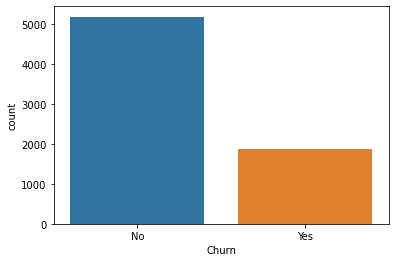

In [42]:
# Revisamos la variable dependiente
sns.countplot(x='Churn', data = df)

Podemos ver que ha habido una alta tasa de fuga con respecto al total

Ahora, cambiamos el tipo de variable convirtiendo las variables categoricas en numéricas, revisando caso a caso el numero de categorías que puede tomar la variable.

In [43]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [44]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [45]:
df = df.dropna()

In [46]:
def yes_no_numerico(col):
  col = col.replace('Yes', 1)
  col = col.replace('No', 0)
  return col

In [47]:
def nophone_yes_no_numerico(col):
  col = col.replace('Yes', 2)
  col = col.replace('No', 1)
  col = col.replace('No phone service', 0)
  col = col.replace('No internet service', 0)
  return col

In [48]:
df['Partner'] = yes_no_numerico(df['Partner'])
df['Dependents'] = yes_no_numerico(df['Dependents'])
df['PhoneService'] = yes_no_numerico(df['PhoneService'])
df['PaperlessBilling'] = yes_no_numerico(df['PaperlessBilling'])
df['Churn'] = yes_no_numerico(df['Churn'])

In [49]:
df['MultipleLines'] = nophone_yes_no_numerico(df['MultipleLines'])
df['OnlineSecurity'] = nophone_yes_no_numerico(df['OnlineSecurity'])
df['OnlineBackup' ]  = nophone_yes_no_numerico(df['OnlineBackup' ])   
df['DeviceProtection'] = nophone_yes_no_numerico(df['DeviceProtection'])
df['TechSupport'] = nophone_yes_no_numerico(df['TechSupport'])
df['StreamingTV'] = nophone_yes_no_numerico(df['StreamingTV'])
df['StreamingMovies'] = nophone_yes_no_numerico(df['StreamingMovies'])
df['Contract'] = nophone_yes_no_numerico(df['Contract'])

In [50]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [54]:
df = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

Aplicamos un escalador para la variables con valores mas altos

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columnas_escaladas = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columnas_escaladas] = scaler.fit_transform(df[columnas_escaladas])

In [57]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,1,2,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,1,2,1,2,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,2,2,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,2,1,2,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


## Construccion de modelos

In [58]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
# Importamos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Importamos Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score

Se trabajará con los siguientes modelos:

*   KNN
*   Decision Tree
*   Random Forest
*   XGBoost
*   Support Vector Machine


A continuacion, calculamos el Balanced Accuracy para cada uno de los modelos elegidos y comparamos su rendimiento.

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
balance_accuracy_knn = balanced_accuracy_score(y_test, y_pred_knn)

In [62]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
balance_accuracy_dt = balanced_accuracy_score(y_test, y_pred_dt)

In [63]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
balance_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

In [64]:
xgb = XGBClassifier(n_estimators=100, random_state=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
balance_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)

C:\Users\56986\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
balance_accuracy_svm = balanced_accuracy_score(y_test, y_pred_svm)

Se guardan los balanced accuracy de todos los modelos en un diccionario y se grafican para comparar.

In [66]:
balanced_accuracy = {'knn': balance_accuracy_knn, 'dt': balance_accuracy_dt, 'rf': balance_accuracy_rf, 'xgb': balance_accuracy_xgb, 'svm': balance_accuracy_svm}

In [67]:
balanced_accuracy

{'knn': 0.6701946909730552,
 'dt': 0.6580259499124934,
 'rf': 0.680325684283468,
 'xgb': 0.6794395138722316,
 'svm': 0.6994005579097927}

<BarContainer object of 5 artists>

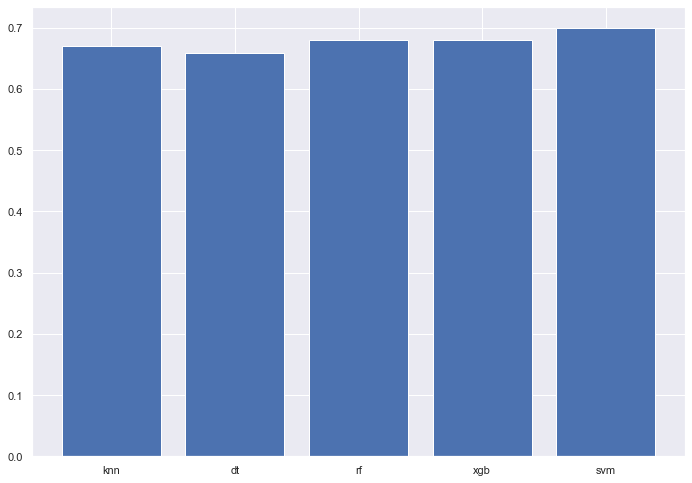

In [68]:
keys = balanced_accuracy.keys()
values = balanced_accuracy.values()

plt.bar(keys, values)

Se puede ver que los modelos presentan rendimientos similares entre 0.65 y 0.70 para la métrica de balanced accuracy.

Se puede ver que el XGBoost presenta un rendimiento ligeramente mejor a los demas, esto puede deberse a que al ser un modelo de tipo ensamble es menos propenso a tener overfitting. 

Tambien se puede ver que los modelos de KNN y Desicion Tree presentaron menor rendimiento. Se sabe que estos son clasificadores débiles, por lo que podria explicar su rendimineto menor.

Finalmente se ven rendimientos similares en los demas modelos, aunque mas bajos que el SVM.

## Validacion

En esta actividad se trabajará con la libreria [sklearn](https://scikit-learn.org/stable/), en particular con la funcion Grid Search para encontrar los hyperparametros adecuados para un modelo de Machine Learning.

In [75]:
# Importamos Gridsearch
from sklearn.model_selection import GridSearchCV

In [77]:
# Creamos un diccionario para establecer los nombres de los modelos y sus respectivos valores a iterar

model_params_churn = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'xgboost':{
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [1,5,10,50,100]
        }
    },
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors': [1,3,5,10,15]
        }
    }
}

In [ ]:
# Creamos una lista vacia para guardar la información
scores_churn = []

# Iteramos los modelos y los parametros definidos anteriormente
for model_name, mp in model_params_churn.items():

    # Elegimos uno de los modelos, designamos un kfold de 5 para el CV
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    # Entrenamos el modelo
    clf.fit(X, y)

    # Guardamos información del modelo
    scores_churn.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })



In [79]:
# Creamos un dataframe con la información guardada de todos los modelos
df_scores_churn = pd.DataFrame(scores_churn,columns=['model','best_score','best_params'])
df_scores_churn

,model,best_score,best_params
0,svm,0.800196,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.792232,{'n_estimators': 100}
2,logistic_regression,0.804323,{'C': 10}
3,xgboost,0.800339,{'n_estimators': 10}
4,knn,0.777587,{'n_neighbors': 15}


Luego de haber probado con diferentes valores para cada uno de los modelos, para este caso, el mejor score fue alcanzado usando Logistic Regression.